In [1]:
import glob
import numpy as np # scientifique computation
import pandas as pd # data manipulation
from matplotlib import pyplot as plt # dataviz
import seaborn as sns
%matplotlib notebook
%matplotlib inline
pd.options.display.max_columns = None

# split dataset & prepare 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# pipeline
from sklearn.pipeline import Pipeline

# ML model
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# DL model
from sklearn.neural_network import MLPRegressor

# metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
path_to_interim = '../data/interim/'
files = sorted(glob.glob(path_to_interim+'*'))

# upload dataset
df = pd.read_csv(files[0])

# choose relevant features
to_drop = ['engine_id', 'time_cycle', 'max_cycle'] # id/label cols
cst_features = ['op_set_3', 'sensor_18', 'sensor_19'] # constant features
quasi_cst_features = ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16'] # quasi-constant features
high_corr_to_drop = ['sensor_14'] # drop corrected core speed - sensor 14
discreet_features = ['op_set_2', 'sensor_17']

# keep the ones to use for ML
cols_to_keep = [x for x in df.columns if x not in 
                to_drop + cst_features + quasi_cst_features + ['RUL']]

cols_to_keep_2 = [x for x in df.columns if x not in 
                to_drop + cst_features + quasi_cst_features + high_corr_to_drop + discreet_features + ['RUL']]

In [40]:
cols_to_keep

['op_set_1',
 'op_set_2',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_17',
 'sensor_20',
 'sensor_21',
 'HI']

In [41]:
# assign target and features
y = df['RUL']
X = df[cols_to_keep]

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# features scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(16504, 17) (4127, 17)
(16504,) (4127,)


In [42]:
pd.DataFrame(X_train) 
X_train.shape

(16504, 17)

In [43]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04,1.650400e+04
mean,2.475534e-18,-6.457914e-18,-1.064207e-13,-9.622292e-16,8.970917e-15,-1.612509e-13,-3.131335e-12,-3.295527e-15,1.195704e-14,4.080950e-14,8.344466e-12,5.478103e-14,-3.223575e-17,-4.511822e-15,-1.930642e-14,4.567575e-14,-3.788643e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-3.976916e+00,-2.056856e+00,-2.938678e+00,-3.172346e+00,-2.966727e+00,-3.956183e+00,-2.771903e+00,-1.869384e+00,-2.587606e+00,-3.499778e+00,-2.997504e+00,-2.291070e+00,-3.126635e+00,-3.367325e+00,-3.623265e+00,-3.639569e+00,-1.730663e+00
25%,-6.789937e-01,-1.031152e+00,-7.251406e-01,-6.938832e-01,-7.303655e-01,-6.354530e-01,-6.587705e-01,-5.495113e-01,-7.157672e-01,-6.153261e-01,-7.791816e-01,-5.543735e-01,-7.256746e-01,-7.825025e-01,-6.418053e-01,-6.269931e-01,-8.665466e-01
50%,8.073512e-03,-5.448377e-03,-6.706185e-02,-6.887953e-02,-1.045843e-01,8.497643e-02,-9.526851e-02,-2.077898e-01,-1.167789e-01,8.885929e-02,-8.595595e-02,-1.709504e-01,-8.612913e-02,-1.362968e-01,7.595360e-02,7.388444e-02,-2.013795e-03
75%,6.951407e-01,6.783540e-01,6.508422e-01,6.289125e-01,6.245675e-01,7.266089e-01,6.091090e-01,1.861314e-01,5.945196e-01,7.253345e-01,6.072697e-01,2.358410e-01,6.233667e-01,5.099089e-01,7.385002e-01,7.121343e-01,8.652826e-01
max,3.993063e+00,2.045959e+00,3.681993e+00,4.288661e+00,3.617869e+00,2.809100e+00,6.525880e+00,8.085299e+00,3.701771e+00,2.661844e+00,6.430365e+00,7.828063e+00,3.799110e+00,4.387143e+00,3.388687e+00,3.030280e+00,1.718809e+00


In [44]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

print(f'R² score : {svr.score(X_train, y_train)}')
y_pred = svr.predict(X_test)

R² score : 0.8175642144905415


In [45]:
print(f'R² score : {r2_score(y_test, y_pred)}')
print(f'MSE      : {mean_squared_error(y_test, y_pred)}')

R² score : 0.8171680508192459
MSE      : 864.0966025077306


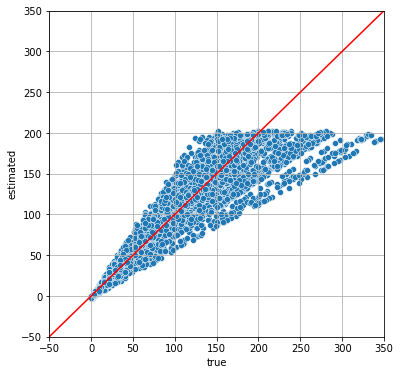

In [46]:
def plot_rul_true_estimated():

    # reset index y_test
    y_test.reset_index(drop=True, inplace=True)

    # create RUL df to compute error,d and score,s
    RUL = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1, ignore_index=True )
    RUL.rename(columns={0:'true', 1:'estimated'}, inplace=True)

    # cast as int
    RUL['estimated'] = [int(i) for i in RUL['estimated']]

    # compute error d
    RUL['error'] = RUL['estimated'] - RUL['true']
    
    # plotting
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=RUL, x='true', y='estimated')
    sns.lineplot(x=np.arange(-50,350), y=np.arange(-50,350), color = 'red')
    plt.xlim(-50,350)
    plt.ylim(-50,350)
    plt.grid()
    plt.show()
    
plot_rul_true_estimated()    